In [1]:
from Lane_Detection.lane_detection import LaneDetector
import matplotlib.image as mimg
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.17.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


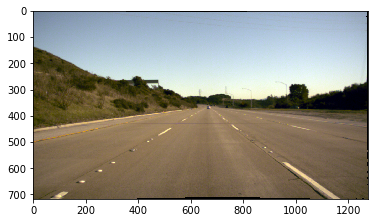

In [2]:
img_rgb = mimg.imread("/data3/sb56/CP_proj/color_images/color_images/valid/images-2014-12-22-14-19-07_mapping_280S_3rd_lane/1419286920_0093859000_color_rect.png")
plt.imshow(img_rgb)

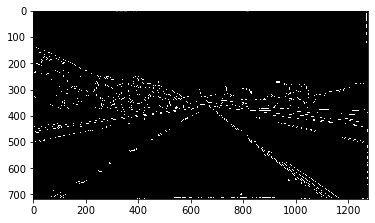

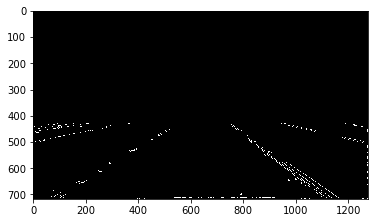

In [3]:
ld = LaneDetector(0.05, 0.09, 7, line_threshold=100)
lane_img, lines_xy = ld.detect_lanes(img_rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


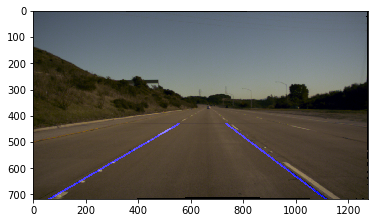

In [4]:
plt.imshow(lane_img)

In [11]:
def get_x_values(lines_xy):

    l0_x_values = None
    if lines_xy[0] is not None:
        l0_y_values = np.arange(301, 717 + 1)
        l0_x_values = ((l0_y_values - 717) * (lines_xy[0][2] - lines_xy[0][0]) / (lines_xy[0][3] - 717) + lines_xy[0][0]).astype(int)

    r0_x_values = None
    if lines_xy[1] is not None:
        r0_y_values = np.arange(301, 717 + 1)
        r0_x_values = ((r0_y_values - 717) * (lines_xy[1][2] - lines_xy[1][0]) / (lines_xy[1][3] - 717) + lines_xy[1][0]).astype(int)

    return l0_x_values, r0_x_values


In [12]:
lines_xy

[(61, 717, 557, 430), (1116, 717, 735, 430)]

In [13]:
l0, r0 = get_x_values(lines_xy)

In [14]:
import json

data = {
    "images-2014-12-22-14-19-07_mapping_280S_3rd_lane/1419286920_0093859000.json":{
        "l0": l0.tolist(),
        "r0": r0.tolist()
    }
}

json_data = json.dumps(data, indent=4)

with open('output.json', 'w') as file:
    file.write(json_data)

In [15]:
from llamas_evaluation import evaluate

In [16]:
evaluate.evaluate("output.json", "valid")

Overall mean absolute error 375.0018879962018
Invidiaul lanes {'l1': nan, 'l0': 231.40076335877862, 'r0': 518.603012633625, 'r1': nan}


/data3/sb56/CP_proj/repo/final_project/llamas_evaluation/evaluate.py:95: RuntimeWarning: Mean of empty slice
  results[key] = numpy.nanmean(value)
